In [35]:
# https://www.geeksforgeeks.org/ways-to-import-csv-files-in-google-colab/ - to import csv file
# blog as reference - https://towardsdatascience.com/time-series-forecasting-predicting-stock-prices-using-an-arima-model-2e3b3080bd70

from google.colab import files
uploaded = files.upload()


Saving Apple.csv to Apple.csv


In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import statsmodels.api as smapi
import io
from pandas.plotting import lag_plot
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

In [38]:
df = pd.read_csv(io.BytesIO(uploaded['Apple.csv']))
# print(df)
df.head(100)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-08-24,149.449997,150.860001,149.149994,149.619995,149.401947,48606400
1,2021-08-25,149.809998,150.320007,147.800003,148.360001,148.143784,58991300
2,2021-08-26,148.350006,149.119995,147.509995,147.539993,147.324982,48597200
3,2021-08-27,147.479996,148.750000,146.830002,148.600006,148.383453,55721500
4,2021-08-30,149.000000,153.490005,148.610001,153.119995,152.896851,90956700
...,...,...,...,...,...,...,...
95,2022-01-07,172.889999,174.139999,171.029999,172.169998,172.169998,86580100
96,2022-01-10,169.080002,172.500000,168.169998,172.190002,172.190002,106765600
97,2022-01-11,172.320007,175.179993,170.820007,175.080002,175.080002,76138300
98,2022-01-12,176.119995,177.179993,174.820007,175.529999,175.529999,74805200


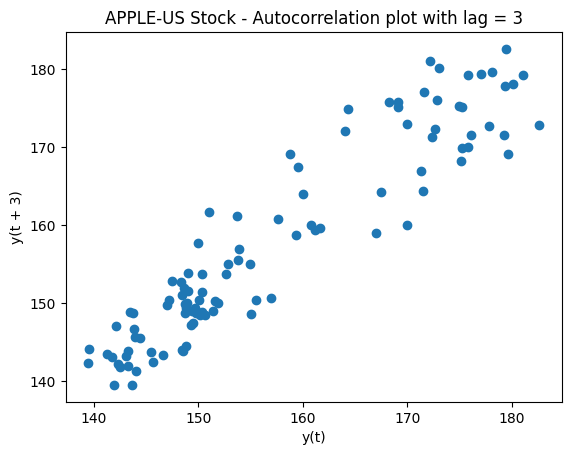

In [30]:
#code to check auto correlation
plt.figure()
lag_plot(df['Open'], lag=3)
plt.title('APPLE-US Stock - Autocorrelation plot with lag = 3')
plt.show()
#(There is auto-correlation in the data).
#We can now confirm that ARIMA is going to be a good model to be applied to this type of data

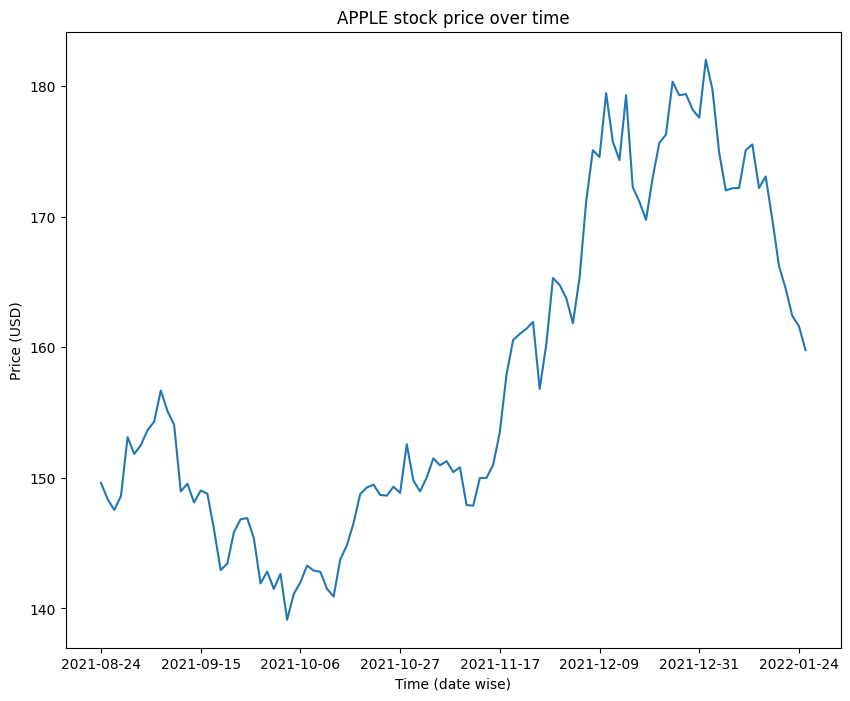

In [31]:
#blog for xticks = https://www.geeksforgeeks.org/matplotlib-pyplot-xticks-in-python/
#blog for np.arrange = https://realpython.com/how-to-use-numpy-arange/
#es perfectose... figsize not above the plt.plot() was causing the issue.
plt.figure(figsize = (10,8))
plt.plot(df["Date"], df["Close"])
plt.xticks(np.arange(0,108, 15), df['Date'][0:108:15])
plt.title("APPLE stock price over time")
plt.xlabel("Time (date wise)")
plt.ylabel("Price (USD)")

plt.show()


In [32]:
# For this we select the following ARIMA parameters: p=4, d=1 and q=0.
#training 100 rows, test 5 rows
data_train, data_test = df[0:100], df[100:108]
training_data = data_train['Close'].values
data_test = data_test['Close'].values
history = [x for x in training_data]
model_predictions = []
N_observations_test = len(data_test)
for time_point in range(N_observations_test):
    model = smapi.tsa.arima.ARIMA(history, order=(1,1,2))
    model_fit = model.fit()
    # model = ARIMA(history, order=(4,1,0))
    # model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    model_predictions.append(yhat)
    true_test_value = data_test[time_point]
    history.append(true_test_value)
MSE_error = mean_squared_error(data_test, model_predictions)
print('Testing Mean Squared Error is {}'.format(MSE_error))

Testing Mean Squared Error is 4.908388388433771


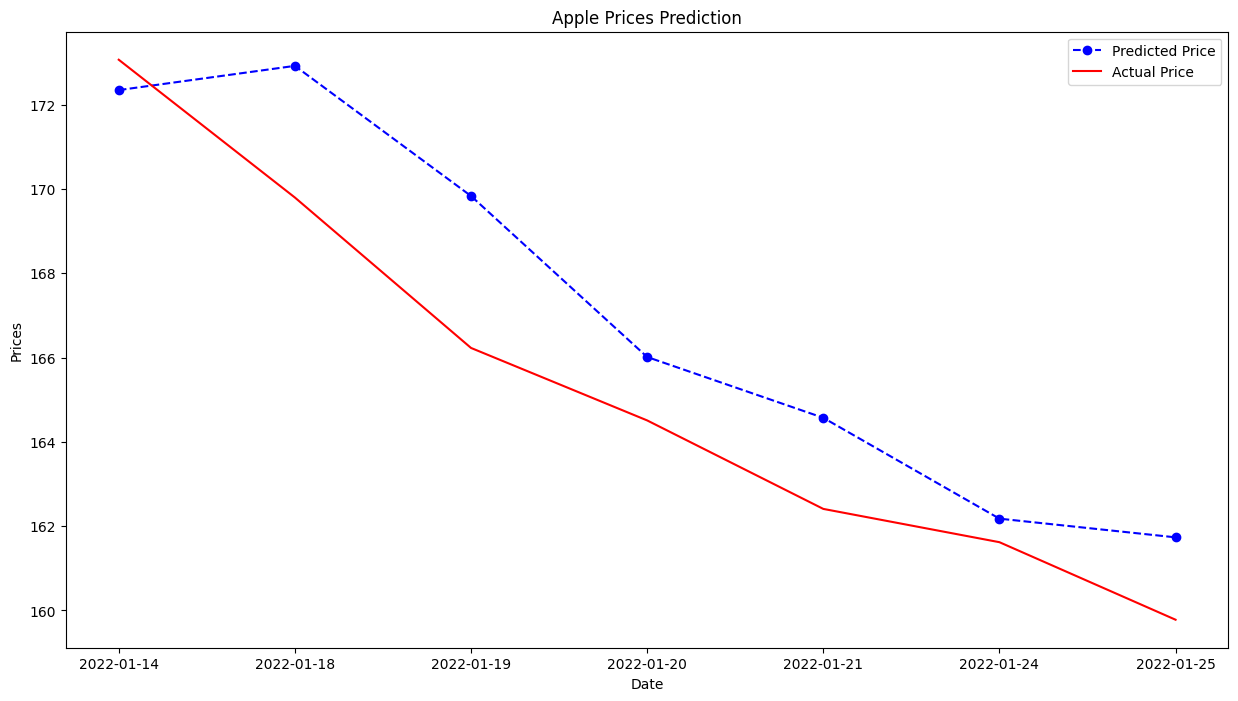

In [34]:

# Let’s visualize the predictions to understand the performance of the model more.

test_set_range = df[100:107].index
plt.figure(figsize = (15,8))
plt.plot(test_set_range, model_predictions, color='blue', marker='o', linestyle='dashed',label='Predicted Price')
plt.plot(test_set_range, data_test, color='red', label='Actual Price')
plt.title('Apple Prices Prediction')
plt.xlabel('Date')
plt.ylabel('Prices')
plt.xticks(np.arange(100,107,1), df.Date[100:107:1])
plt.legend()
plt.show()